In [46]:
import numpy as np
import pandas as pd
import sklearn
import re



In [47]:
file ='/home/swaraj/Downloads/phone/Rental data pune.xlsx'
df= pd.read_excel(file)

In [48]:
type(df['BHK'][0])

str

In [49]:
 df['bhk']=df['BHK'].apply(lambda x: re.sub(r"\D", " ", str(x)) )#removing the string
df['bath_clean']=df['Bath'].apply(lambda x: re.sub(r"\D", "", str(x)) )

In [50]:
df['source']='99acres'

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9890 entries, 0 to 9889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Link         9890 non-null   object
 1   Title        9890 non-null   object
 2   location     8764 non-null   object
 3   Rent         9890 non-null   object
 4   Area Sq.ft   9890 non-null   object
 5   BHK          9835 non-null   object
 6   Bath         8727 non-null   object
 7   Posted Date  9890 non-null   object
 8   Name         9889 non-null   object
 9   bhk          9890 non-null   object
 10  bath_clean   9890 non-null   object
 11  source       9890 non-null   object
dtypes: object(12)
memory usage: 927.3+ KB


In [52]:
df['Bath'].describe()

count        8727
unique         10
top       2 Baths
freq         4030
Name: Bath, dtype: object

In [53]:
df['BHK']= df['BHK'].dropna(axis=0)

In [54]:
df=df.dropna()

In [55]:
df['Bath']=df['Bath'].fillna(2)

In [56]:
df['dates']=df['Posted Date'].apply(lambda x: re.sub(r"Posted on", " ", str(x)) )

In [57]:
df['dates']=df['dates'].apply(lambda x: re.sub(r"by", " ", str(x)) )

In [58]:
df['dates']=df['dates'].apply(lambda x: re.sub(r"Today", "17th Mar, 2021 ", str(x)) )
df['dates']=df['dates'].apply(lambda x: re.sub(r"Yesterday", "16th Mar, 2021 ", str(x)) )
df['dates']=pd.to_datetime(df['dates'])

In [59]:
df

,Link,Title,location,Rent,Area Sq.ft,BHK,Bath,Posted Date,Name,bhk,bath_clean,source,dates
0,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Mahalunge,Saarthi Soverign,"₹ 15,000",950,2 BHK,2 Baths,Posted on Today by,Channa,2,2,99acres,2021-03-17
1,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in B.T Ka...,"Maruti Enclave, Tara Dutta Colony","₹ 12,000",600,2 BHK,1 Bath,Posted on Today by,Santosh Shrivastava,2,1,99acres,2021-03-17
2,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Vijay ...,Jeveen Anand,"₹ 14,000",782,2 BHK,2 Baths,Posted on Today by,Prashant,2,2,99acres,2021-03-17
4,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Lohegaon,Goodwill Unique Zest County,"₹ 16,000",667,2 BHK,2 Baths,Posted on Today by,Sharat Pavate,2,2,99acres,2021-03-17
5,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Manik ...,Nikhil Park,"₹ 11,000",735,2 BHK,1 Bath,Posted on Today by,Ashok kori,2,1,99acres,2021-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Hinjewadi,Kohinoor Tinsel Town Phase 2,"₹ 23,000","1,011",2 BHK,2 Baths,"Posted on 01st Mar, 2021 by",Ankit,2,2,99acres,2021-03-01
9885,https://www.99acres.com/1-bhk-bedroom-resident...,1 BHK Residential Apartment for rent in Hingan...,Mayureshwara Heights,"₹ 10,000",650,1 BHK,1 Bath,"Posted on 08th Mar, 2021 by",balasaheb,1,1,99acres,2021-03-08
9886,https://www.99acres.com/1-bhk-bedroom-resident...,1 BHK Residential Apartment for rent in Pimple...,Vaishnavi Sahil Heights,"₹ 14,000",583,1 BHK,2 Baths,"Posted on 22nd Feb, 2021 by",Mayur jagtap,1,2,99acres,2021-02-22
9888,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment for rent in Bhukum,SKYi Star Towers,"₹ 12,500",570,2 BHK,2 Baths,"Posted on 09th Mar, 2021 by",Abhishek Kumar,2,2,99acres,2021-03-09


In [60]:
#df['Rent']=df['Rent'].apply(lambda x: re.sub(r"\D", "", str(x)) )

In [61]:
df['Area Sq.ft']=df['Area Sq.ft'].apply(lambda x: re.sub(r"\D", "", str(x)) )


In [62]:
df['Rent']=df['Rent'].apply(lambda x: re.sub('[^A-Za-z0-9]+', "", x) )

In [63]:
df['Rent']=df['Rent'].apply(lambda x: re.sub('PriceonRequest', "NAN", x) )

In [64]:
df['Rent']=df['Rent'].apply(lambda x: int(x) )

In [65]:
df['Rent'].isnull().sum(axis = 0)

0

In [66]:
df.Rent.describe()

count     7744.000000
mean     15153.565212
std       7535.056589
min          1.000000
25%      10000.000000
50%      14000.000000
75%      18500.000000
max      80000.000000
Name: Rent, dtype: float64

In [67]:
df['Title_modify']=df['Title'].apply(lambda x: re.sub(r'^.*?in', '', x))

In [68]:
df['Title_modify'].describe()

count         7744
unique        1295
top        Wagholi
freq           323
Name: Title_modify, dtype: object

In [69]:
df.columns

Index(['Link', 'Title', 'location', 'Rent', 'Area Sq.ft', 'BHK', 'Bath',
       'Posted Date', 'Name', 'bhk', 'bath_clean', 'source', 'dates',
       'Title_modify'],
      dtype='object')

In [70]:
x=df[['Area Sq.ft','bhk', 'bath_clean']]
y=df.Rent

In [71]:
x.head()

,Area Sq.ft,bhk,bath_clean
0,950,2,2
1,600,2,1
2,782,2,2
4,667,2,2
5,735,2,1


In [72]:
x.describe()

,Area Sq.ft,bhk,bath_clean
count,7744,7744,7744
unique,1055,10,9
top,1000,2,2
freq,330,3762,3862


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [75]:
"""from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
x['Title_modify']= label_encoder.fit_transform(x['Title_modify']) """

"from sklearn import preprocessing \n  \n# label_encoder object knows how to understand word labels. \nlabel_encoder = preprocessing.LabelEncoder() \n  \n# Encode labels in column 'species'. \nx['Title_modify']= label_encoder.fit_transform(x['Title_modify']) "

In [76]:
col=x.columns

In [77]:
for c in col:
    try:
        c=str(c)
        x[c]=x[c].apply(lambda x:float(x))
    except:
        x[c]=0

In [78]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [79]:
print(model.feature_importances_)

[0.34139492 0.35826083 0.30034425]


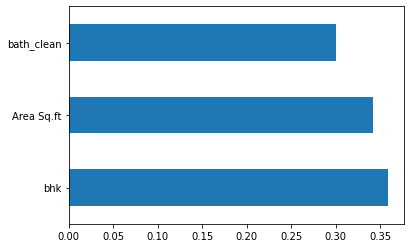

In [81]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [83]:
regressor=RandomForestRegressor()

In [84]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [85]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [86]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [87]:
rf = RandomForestRegressor()

In [88]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [89]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [91]:
rf_random.best_score_

-29171579.96875893

In [93]:
predictions=rf_random.predict(X_valid)

In [95]:
import seaborn as sns

<AxesSubplot:xlabel='Rent', ylabel='Density'>

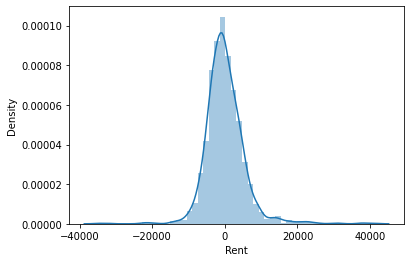

In [97]:
sns.distplot(y_valid-predictions)

In [98]:
!pwd

/run/media/swaraj/volume y/code/work
